Assignment 1

Implementing a Deep Neural Neetwork for Linear Regression task of Boston House Price Prediction using the Boston Housing Dataset.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
df = pd.read_csv("BostonHousing.csv")
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [7]:
x = df.loc[:, df.columns != 'medv']
y = df.loc[:, df.columns == 'medv']
print(y)
xtrain, xtest, ytain, ytest = train_test_split(x, y, test_size=0.3, random_state=123) 

     medv
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]


In [8]:
mms = MinMaxScaler()
mms.fit(xtrain)
xtrain = mms.transform(xtrain)
xtest = mms.transform(xtest)
xtrain[:5], xtest[:5]

(array([[2.34782498e-03, 2.00000000e-01, 2.38269795e-01, 1.00000000e+00,
         1.50313152e-01, 7.99767622e-01, 4.87234043e-01, 2.91802800e-01,
         8.69565217e-02, 6.87022901e-02, 6.38297872e-01, 9.84542841e-01,
         1.37588652e-01],
        [4.56256121e-04, 2.10000000e-01, 1.89882698e-01, 0.00000000e+00,
         9.81210856e-02, 5.71262587e-01, 1.60638298e-01, 5.15231716e-01,
         1.30434783e-01, 1.06870229e-01, 4.46808511e-01, 1.00000000e+00,
         1.00709220e-01],
        [6.28012552e-04, 0.00000000e+00, 7.33137830e-02, 0.00000000e+00,
         2.00417537e-01, 5.00193648e-01, 5.97872340e-01, 1.30395897e-01,
         8.69565217e-02, 1.14503817e-02, 5.53191489e-01, 1.00000000e+00,
         2.19007092e-01],
        [5.70703456e-02, 0.00000000e+00, 6.46627566e-01, 0.00000000e+00,
         6.70146138e-01, 5.29821844e-01, 9.12765957e-01, 1.09432895e-01,
         1.00000000e+00, 9.14122137e-01, 8.08510638e-01, 9.70220384e-01,
         4.40851064e-01],
        [1.78291606e

In [9]:
model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation="relu", name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

c:\Users\sumit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(xtrain, ytain, epochs=100, validation_split=0.05, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 595.3118 - mae: 22.4486 - val_loss: 596.2970 - val_mae: 22.4716
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 559.8958 - mae: 21.5863 - val_loss: 539.4078 - val_mae: 21.1283
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 475.4417 - mae: 19.9622 - val_loss: 451.5284 - val_mae: 18.8320
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 365.6417 - mae: 16.7263 - val_loss: 330.0077 - val_mae: 15.1089
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 260.7849 - mae: 13.2057 - val_loss: 206.8848 - val_mae: 10.7928
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 191.8428 - mae: 10.7358 - val_loss: 140.6016 - val_mae: 8.3918
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 142.5202 - mae: 9.2872 - val_loss: 123.7021 - val_mae: 8.0615
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 119.2379 - mae: 8.4406 - val_loss: 113.0236 - val_mae: 7.6485
Epoch 9/100
11/11 ━━

In [11]:
mse_nn, mae_nn = model.evaluate(xtest, ytest)
print("Mean Squarred Error(test data) :", mse_nn)
print("Mean Absolute Error(test data) :", mae_nn)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.2143 - mae: 3.3262 
Mean Squarred Error(test data) : 21.854076385498047
Mean Absolute Error(test data) : 2.9760501384735107


<Axes: title={'center': 'loss Curves'}, xlabel='Epochs', ylabel='Loss'>

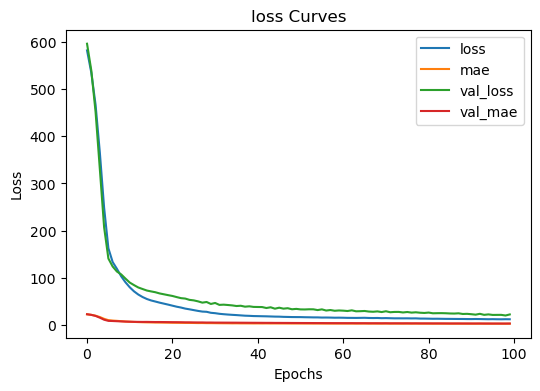

In [12]:
pd.DataFrame(history.history).plot(figsize=(6,4), xlabel="Epochs", ylabel="Loss", title="loss Curves")

In [57]:
y_pred = model.predict(xtest)

y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[33.769047 ],
       [27.107725 ],
       [18.850342 ],
       [22.369448 ],
       [22.134624 ],
       [24.578232 ],
       [24.612375 ],
       [20.946154 ],
       [29.534958 ],
       [34.197628 ],
       [17.517918 ],
       [22.12924  ],
       [18.081604 ],
       [19.482164 ],
       [27.401798 ],
       [30.10294  ],
       [14.938093 ],
       [20.08046  ],
       [22.082336 ],
       [24.997768 ],
       [18.659718 ],
       [11.535035 ],
       [19.165295 ],
       [23.768082 ],
       [23.52497  ],
       [22.30856  ],
       [19.556997 ],
       [30.019278 ],
       [23.929964 ],
       [19.258654 ],
       [17.812859 ],
       [16.468994 ],
       [21.924667 ],
       [23.50199  ],
       [25.032547 ],
       [15.764514 ],
       [24.640469 ],
       [22.595633 ],
       [24.141129 ],
       [19.226053 ],
       [12.386867 ],
       [17.100275 ],
       [28.109852 ],
       [21.866856 ],
       [24.742767 ],
       [20.680042 ],
       [25.181232 ],
       [18.77